In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("./data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
for i in df.columns:    
    sns.kdeplot(df[i])
    plt.savefig(f"./beforePlot/{i}.png", dpi=300)
    plt.close()

In [8]:
for column in df.columns:
    q1, q2, q3 = np.quantile(df[column], [0.25, 0.5, 0.75])
    iqr = q3 - q1
    df = df[(df[column] > (q1- 1.5 * iqr))]
    df = df[(df[column] < (q3 + 1.5 * iqr))]

In [9]:
for i in df.columns:    
    sns.kdeplot(df[i])
    plt.savefig(f"./afterPlot/{i}.png", dpi=300)
    plt.close()

In [10]:
x = df.iloc[:, :8]
y = df.iloc[:, -1]

In [11]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
x, y = oversample.fit_resample(x, y)

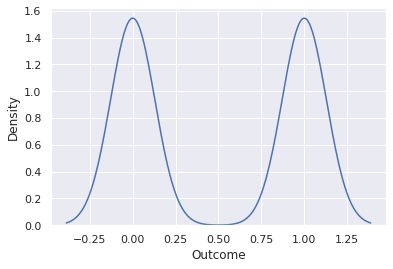

In [14]:
sns.kdeplot(y)
plt.savefig(f"./afterPlot/outcomeDensity.png", dpi=300)

In [15]:
y.value_counts()

0    438
1    438
Name: Outcome, dtype: int64

In [16]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x, y, random_state=42)
mi

array([0.04445464, 0.1237049 , 0.05190265, 0.01002995, 0.07139785,
       0.10085413, 0.02167047, 0.09322066])

In [17]:
mi_table = pd.DataFrame({"Features": x.columns[:8], "mutual_information": mi})
mi_table = mi_table.sort_values(by="mutual_information", ascending=False)
mi_table

,Features,mutual_information
1,Glucose,0.123705
5,BMI,0.100854
7,Age,0.093221
4,Insulin,0.071398
2,BloodPressure,0.051903
0,Pregnancies,0.044455
6,DiabetesPedigreeFunction,0.021670
3,SkinThickness,0.010030


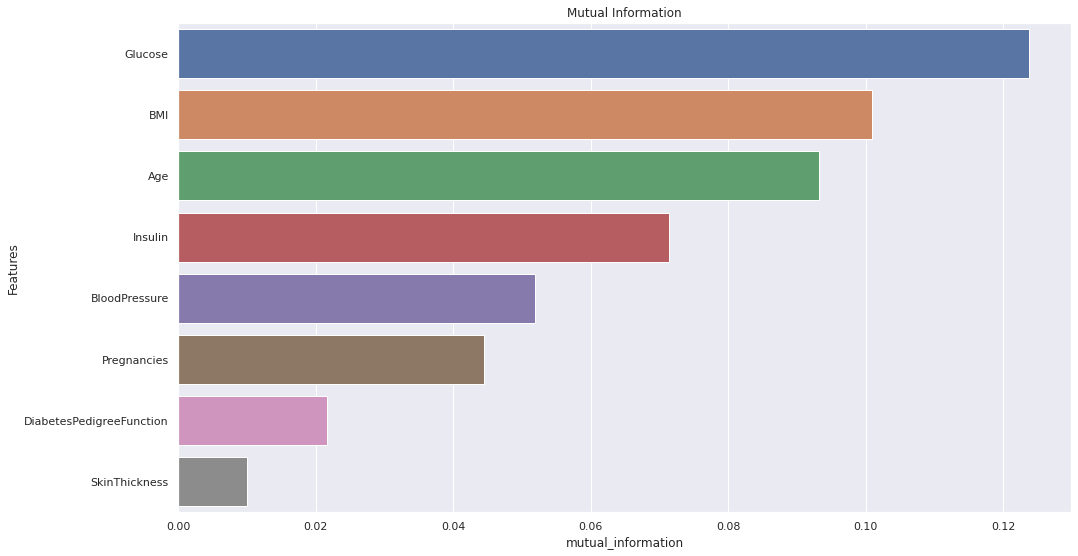

In [18]:
plt.figure(figsize=(16,9))
sns.barplot(x="mutual_information", y="Features", data=mi_table)
plt.title("Mutual Information")
plt.savefig("MutualInfo.png", dpi=300)
plt.show()

In [19]:
x_model = x.iloc[:, [1,2,4,5,7]]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_model, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)

In [22]:
x_train_sc

array([[-1.33254815,  0.85535698,  0.60524811,  0.85761103, -1.04477476],
       [ 1.28659325,  1.04546649, -0.82245475, -0.84591406,  1.9817387 ],
       [ 0.14491623,  0.85535698,  1.26770224, -0.87836216, -1.14240423],
       ...,
       [-0.45950102, -0.57046431,  0.13696157,  0.21284461, -0.55662743],
       [-0.2580286 ,  0.09491896,  0.37681565, -1.07305074, -0.9471453 ],
       [-0.22444986,  1.4256855 ,  0.83368057,  0.25732123,  0.61492617]])

In [23]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold

def modelSelection():
    global pipelines
    pipelines = []
    pipelines.append(('GradientBoosting' , (Pipeline([('data_scaling', StandardScaler()),('GRB' ,GradientBoostingClassifier())]))))
    pipelines.append(('RandomForest' , (Pipeline([('data_scaling', StandardScaler()),('RFC' ,RandomForestClassifier())]))))
    pipelines.append(('KNNeighbor' , (Pipeline([('data_scaling', StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
    pipelines.append(('DecisionTree' , (Pipeline([('data_scaling', StandardScaler()),('DTC' ,DecisionTreeClassifier())]))))
    pipelines.append(('Vector' , (Pipeline([('data_scaling', StandardScaler()),('SVM' ,SVC())]))))
    pipelines.append(('Log' , (Pipeline([('data_scaling', StandardScaler()),('Logistic' ,LogisticRegression())]))))
    pipelines.append(('Gauss' , (Pipeline([('data_scaling', StandardScaler()),('Gaussian' ,GaussianNB())]))))
    
    model_name = []
    scoreMean = []
    scoreStd = []
    results = []
    for pipe ,model in pipelines:
        kfold = KFold(n_splits=10, random_state=42, shuffle=True)
        crossv_results = cross_val_score(model , x_train_sc ,y_train ,cv =kfold , scoring='accuracy')
        results.append(crossv_results)
        model_name.append(pipe)
        scoreMean.append(crossv_results.mean())
        scoreStd.append(crossv_results.std())
        print(f"model: {pipe}, accuracy_mean: {crossv_results.mean()}, accuracy_std: {crossv_results.std()}")
    aftermath = pd.DataFrame({"model": model_name, "accuracyMean": scoreMean, "accuracyStd": scoreStd})
    aftermath = aftermath.sort_values(by="accuracyMean", ascending=False)
    return aftermath

In [25]:
aftermath = modelSelection()

model: GradientBoosting, accuracy_mean: 0.7814285714285714, accuracy_std: 0.05926419575054726
model: RandomForest, accuracy_mean: 0.8014285714285714, accuracy_std: 0.0416251493838099
model: KNNeighbor, accuracy_mean: 0.78, accuracy_std: 0.03270149469217029
model: DecisionTree, accuracy_mean: 0.7528571428571429, accuracy_std: 0.05072937401304201
model: Vector, accuracy_mean: 0.7728571428571428, accuracy_std: 0.029589021681725693
model: Log, accuracy_mean: 0.7157142857142856, accuracy_std: 0.037498299281161974
model: Gauss, accuracy_mean: 0.7114285714285714, accuracy_std: 0.04370588154508101


In [26]:
aftermath

,model,accuracyMean,accuracyStd
1,RandomForest,0.801429,0.041625
0,GradientBoosting,0.781429,0.059264
2,KNNeighbor,0.780000,0.032701
4,Vector,0.772857,0.029589
3,DecisionTree,0.752857,0.050729
5,Log,0.715714,0.037498
6,Gauss,0.711429,0.043706


In [27]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[('data_scaling', StandardScaler()),('RFC' ,RandomForestClassifier())])

param_grid = {
    'RFC__bootstrap': [True],
    'RFC__max_depth': [80, 90, 100, 110],
    'RFC__min_samples_leaf': [3, 4, 5],
    'RFC__min_samples_split': [8, 10, 12],
    'RFC__n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
grid_result = grid_search.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Score:  0.8042857142857145
Best Params:  {'RFC__bootstrap': True, 'RFC__max_depth': 100, 'RFC__min_samples_leaf': 4, 'RFC__min_samples_split': 8, 'RFC__n_estimators': 100}


In [28]:
classifier = Pipeline(steps=[
    ('data_scaling', StandardScaler()),
    ('model', RandomForestClassifier(bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=100))
])

In [29]:
classifier.fit(x_train ,y_train)

Pipeline(steps=[('data_scaling', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=100, min_samples_leaf=3,
                                        min_samples_split=8))])

In [30]:
classifier.predict(x_test)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [31]:
y_test

365    0
655    1
828    1
692    1
213    1
      ..
408    1
290    1
467    0
81     0
314    1
Name: Outcome, Length: 176, dtype: int64

In [32]:
import joblib
joblib.dump(classifier, 'classifier.pkl')

['classifier.pkl']

In [33]:
# Loading back in our serialized model
loaded_model = joblib.load('classifier.pkl')

In [34]:
# Checking out our predicted results using the validation dataset
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
pipeline_preds = loaded_model.predict(x_test)
val_accuracy = accuracy_score(y_test, pipeline_preds)
val_confusion_matrix = confusion_matrix(y_test, pipeline_preds)
val_f1_score = f1_score(y_test, pipeline_preds)
print(f'Accuracy Score: {val_accuracy}')
print(f'F1 score: {val_f1_score}')
print(f'Confusion Matrix: \n{val_confusion_matrix}')

Accuracy Score: 0.7897727272727273
F1 score: 0.7885714285714285
Confusion Matrix: 
[[70 19]
 [18 69]]
